**Plotting Ridge Coefficients as a function of the regularization**

Shows the effect of collinearity in the coefficients of an estimator. Each color represents a different feature of the coefficient vector, and this is displayed as a function of the regularization parameter. 

This example also shows the usefuness of applying Ridge Regression to highly ill-conditioned matrices. For such matrices, a slight change in the target variable can cause huge variances in the calculated weights. In such cases, it is useful to set a certain regularization (alpha) to reduce this variation (noise).

Higher alpha leads to underfitting and lower alpha leads to overfitting. If alpha = 0, the model behaves like an OLS model (coefficients exhibit big oscillations). In practice, it is necessary to tune alpha in such a way that a balance is maintained between regularization effect and minimizing the squared loss function. 


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# X is the 10 * 10 Hilbert Matrix

X = 1.0/ (np.arange(1,11) + np.arange(0,10) [:, np.newaxis])

y = np.ones(10)


**Computing the paths**

In [7]:
n_alphas = 200

alphas = np.logspace(-10,-2, n_alphas)

coefs = []

for a in alphas:
    reg = linear_model.Ridge(alpha = a, fit_intercept = False)
    reg.fit(X,y)
    coefs.append(reg.coef_)

print(coefs)

[array([   2.64506205,  -27.60371134,    7.99290075,  133.67545048,
         18.04325817, -123.85505019, -175.62005438, -113.78635234,
         45.15378036,  274.0230532 ]), array([   2.77495262,  -30.12097666,   17.90675701,  125.4256766 ,
         10.71783273, -122.86632262, -168.64645608, -106.59629008,
         46.70073073,  265.22299856]), array([   2.89641306,  -32.48098287,   27.21873974,  117.65913551,
          3.8337986 , -121.92544334, -162.07887989,  -99.8316458 ,
         48.15085983,  256.93545965]), array([   3.00959603,  -34.68697235,   35.9423522 ,  110.36414769,
         -2.61957157, -121.03068767, -155.90696765,  -93.48138775,
         49.50641286,  249.14680817]), array([   3.11468965,  -36.74289694,   44.09397046,  103.52648282,
         -8.65486956, -120.18030121, -150.11799966,  -87.5326296 ,
         50.77014646,  241.84082867]), array([   3.21190964,  -38.65327118,   51.69227367,   97.12988483,
        -14.28641297, -119.37202172, -144.69783623,  -81.97067738,


**Displaying the results**

(0.025118864315095794,
 3.9810717055349695e-11,
 -198.10220975454757,
 296.50520857510946)

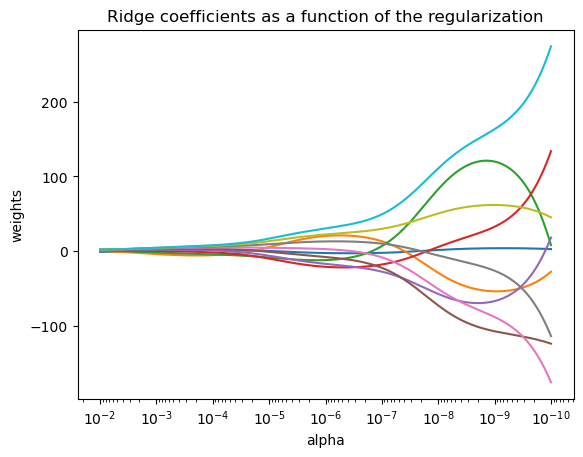

In [12]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) #reverse the axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')

